In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer

     |████████████████████████████████| 40kB 2.8MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=d65389126360302eb631cd7fe768481933cdb188fb535817d68a3fb4bc52644a
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [ ]:
df = pd.read_csv('/content/train.csv')
df.drop(['Unnamed: 0', 'id', ], axis=1, inplace=True)
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17961.000000,17917.000000
mean,39.100440,1193.402762,2.733422,3.057458,2.759869,2.972496,3.208563,3.247202,3.432994,3.354769,3.375202,3.342910,3.628417,3.298480,3.641445,3.290129,14.706364,15.091701
std,15.063715,1001.190209,1.331552,1.531239,1.400869,1.284922,1.335375,1.347488,1.317300,1.335431,1.288819,1.312757,1.182464,1.267261,1.178522,1.316275,37.264749,37.754968
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,39.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1746.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


Gender                                0
Customer Type                         0
Age                                   1
Type of Travel                        1
Class                                 1
Flight Distance                       1
Inflight wifi service                 1
Departure/Arrival time convenient     1
Ease of Online booking                1
Gate location                         1
Food and drink                        1
Online boarding                       1
Seat comfort                          1
Inflight entertainment                1
On-board service                      1
Leg room service                      1
Baggage handling                      1
Checkin service                       1
Inflight service                      1
Cleanliness                           1
Departure Delay in Minutes            1
Arrival Delay in Minutes             45
satisfaction                          1
dtype: int64

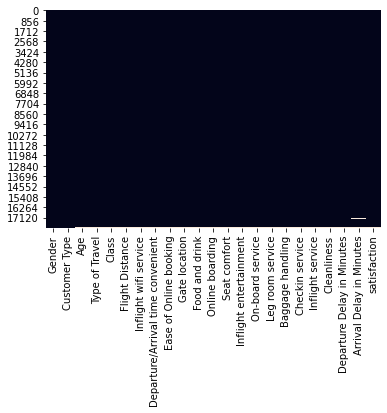

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
df.isnull().sum()

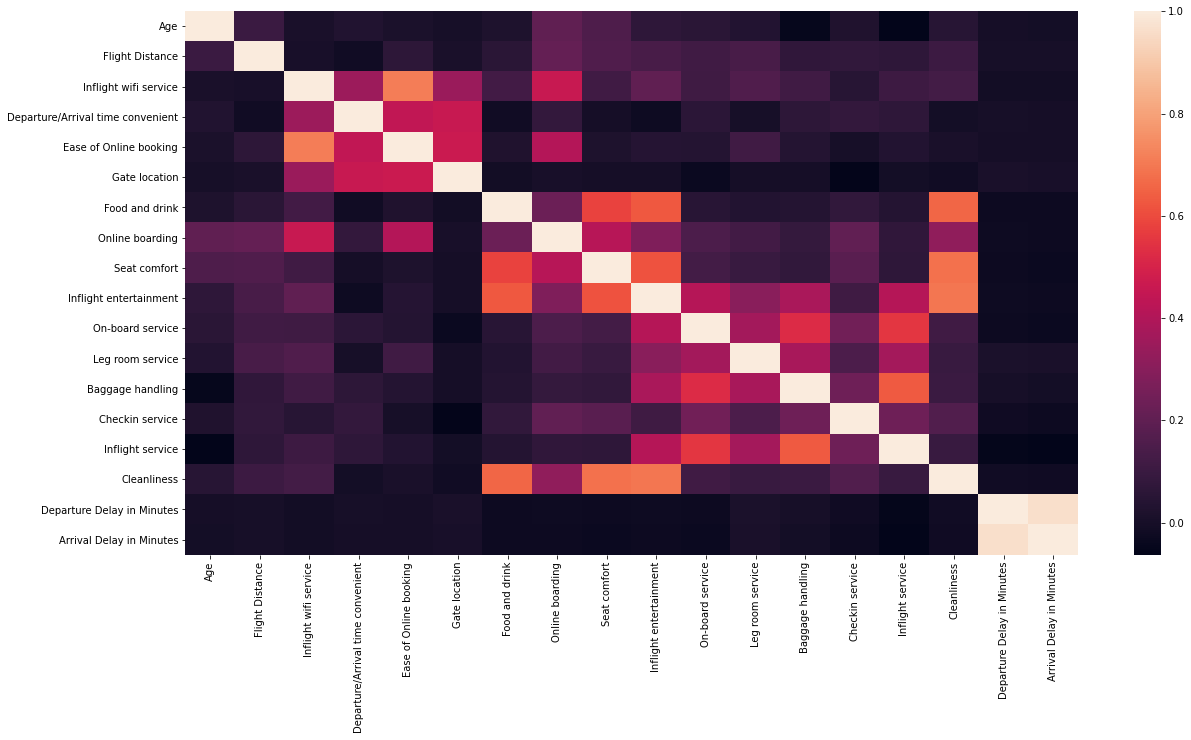

In [ ]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c)

In [ ]:
df.drop(['Arrival Delay in Minutes'], axis=1, inplace=True)

In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Gender, Customer Type, Age, Type of Travel, Class, Flight Distance, Inflight wifi service, Departure/Arrival time convenient, Ease of Online booking, Gate location, Food and drink, Online boarding, Seat comfort, Inflight entertainment, On-board service, Leg room service, Baggage handling, Checkin service, Inflight service, Cleanliness, Departure Delay in Minutes, satisfaction]
Index: []


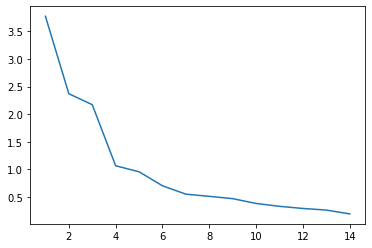

In [ ]:
#Subset of the data
x =df[df.columns[6:20]] 

fa = FactorAnalyzer()
fa.fit(x, 10)

#Get Eigen values and plot
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [ ]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(x)
loads = fa.loadings_
print(loads)

[[ 0.17479916  0.12349646  0.75396184]
 [-0.03439587  0.05931896  0.50104465]
 [ 0.03365866  0.02098525  0.92960794]
 [-0.04409442 -0.02660022  0.50577019]
 [ 0.7603541   0.00716797 -0.00432124]
 [ 0.4056694   0.11460438  0.35648767]
 [ 0.7926874   0.08373695  0.02012661]
 [ 0.74821799  0.45602295  0.00843675]
 [ 0.09831316  0.694161    0.02495092]
 [ 0.07427071  0.47805493  0.08647352]
 [ 0.01329288  0.76548608  0.03011878]
 [ 0.13503479  0.27601207  0.01978648]
 [ 0.01589791  0.79073265  0.02033941]
 [ 0.8644938   0.08282424 -0.00593185]]


In [ ]:
!pip install pingouin
import pingouin as pg

     |████████████████████████████████| 204kB 5.3MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.10-cp37-none-any.whl size=203396 sha256=d0bb4889ed74c533c80ee3e433c845a48a6a07cac6c32e4e305a2abf4ead23bb
  Stored in directory: /root/.cache/pip/wheels/e6/f4/06/b5046209e6c0d96b4dea243c45e926b5c0dd88e23b01c45f92
  Created wheel for outdated: filename=outdated-0.2.0-cp37-none-any.whl size=4962 sha256=09390d8c171d56661095f2295c6a17e44626de33e978fc9865741c3f4a3155b0
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7051 sha256=f024caab9be4cab1314646c332aa3845b32f4f4eada59e46e093c8ab3c796299
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [ ]:
#Create factors
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]

#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)

print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.8794653019544321, array([0.877, 0.882])) (0.7888948618164844, array([0.783, 0.794])) (0.7664477357314152, array([0.761, 0.772]))
